In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

In [2]:
def get_events(tstamp,state, type):
    if type == "UP":
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==1,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events
    elif type == 'DOWN':
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==0,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events        
    elif type == "BOTH":
        mask = np.concatenate((np.array([False]),state[1:]!=state[:-1]))
        events = tstamp[mask]
        return events
    else:
        return None

In [3]:
fname = './XENOMAI/no_stress/untitled.csv'
no_stress_data = np.genfromtxt(fname,delimiter = ',', skip_header = 1);

In [11]:
pps1_events = np.array([])
pps2_events = np.array([])
user_events = np.array([])

raw_ts = no_stress_data[:,0];
raw_pps = no_stress_data[:,2];
raw_user = no_stress_data[:,1];

# delete the first invalid signals
raw_data = [raw_pps, raw_user]

pps_event =  get_events(raw_ts,raw_pps,'UP');
user_event = get_events(raw_ts,raw_user,'BOTH');
first_pps = pps_event[0];
user_event = user_event[user_event > first_pps];

event_cnt = min(len(pps_event),len(user_event));
pps_event = pps_event[0:event_cnt-1];
user_event = user_event[0:event_cnt-1];

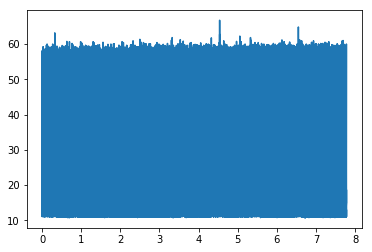

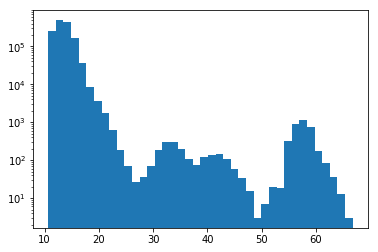

In [17]:
dif_no_stress = user_event - pps_event;

plot(pps_event/3600,dif_no_stress*1e6);
show();
hist(dif_no_stress*1e6,bins=40)
yscale('log')

In [40]:
fname = './XENOMAI/stress/untitled.csv';
stress_data = np.genfromtxt(fname,delimiter = ',', skip_header = 1);

In [41]:
pps1_events = np.array([])
pps2_events = np.array([])
user_events = np.array([])

raw_ts = stress_data[:,0];
raw_pps = stress_data[:,2];
raw_user = stress_data[:,1];

# delete the first invalid signals
raw_data = [raw_pps, raw_user]

pps_event =  get_events(raw_ts,raw_pps,'UP');
user_event = get_events(raw_ts,raw_user,'BOTH');
first_pps = pps_event[0];
user_event = user_event[user_event > first_pps];

event_cnt = min(len(pps_event),len(user_event));
pps_event = pps_event[0:event_cnt-1];
user_event = user_event[0:event_cnt-1];


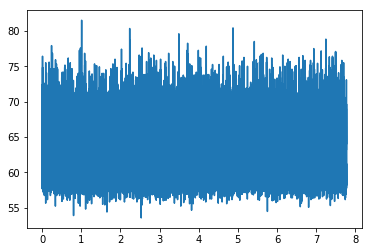

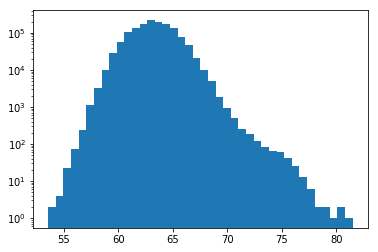

In [42]:
dif_stress = user_event - pps_event;

plot(pps_event/3600,dif_stress*1e6);
show();
hist(dif_stress*1e6,bins=40)
yscale('log')


Sample count: 1399599


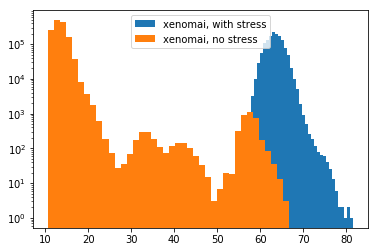

In [48]:
hist(dif_stress*1e6,bins=40,label='xenomai, with stress')
hist(dif_no_stress*1e6,bins=40,label = 'xenomai, no stress')
yscale('log')
legend();
print 'Sample count: %d' % len(dif_stress)

In [50]:
np.save('xeno_stress',dif_stress);
np.save('xeno_no_stress',dif_no_stress);